In [1]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns , sklearn , plotly.express as px


In [3]:
df = pd.read_csv('C:/Users/user/Downloads/listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818.0,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,336,31/05/2023,1.95,1,7,40,NaN
1,20168.0,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,09/04/2020,2.10,2,0,0,NaN
2,213371.0,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,NaN,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270,4,23,08/01/2023,0.16,1,2,1,0363 F88F 4B47 6E9B 225B
3,155548.0,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161,Maria,NaN,Oud-Oost,52.36420,4.92829,Entire home/apt,200,3,21,20/08/2019,0.15,1,0,0,0363 A562 4D7E 4A91 60DF
4,27886.0,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,137,3,251,01/05/2023,1.81,1,0,20,NaN


In [4]:
df.drop(columns=['neighbourhood_group'],inplace=True)

In [5]:
selected_columns = ['host_id','neighbourhood','latitude','longitude','room_type','price','minimum_nights','reviews_per_month','number_of_reviews','calculated_host_listings_count','availability_365','number_of_reviews_ltm']
df = df[selected_columns]

In [6]:
df.head()

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_per_month,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,3159,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,1.95,336,1,7,40
1,59484,Centrum-Oost,52.36407,4.89393,Private room,106,1,2.10,339,2,0,0
2,1100324,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270,4,0.16,23,1,2,1
3,748161,Oud-Oost,52.36420,4.92829,Entire home/apt,200,3,0.15,21,1,0,0
4,97647,Centrum-West,52.38761,4.89188,Private room,137,3,1.81,251,1,0,20


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         7608 non-null   int64  
 1   neighbourhood                   7608 non-null   object 
 2   latitude                        7608 non-null   float64
 3   longitude                       7608 non-null   float64
 4   room_type                       7608 non-null   object 
 5   price                           7608 non-null   int64  
 6   minimum_nights                  7608 non-null   int64  
 7   reviews_per_month               6898 non-null   float64
 8   number_of_reviews               7608 non-null   int64  
 9   calculated_host_listings_count  7608 non-null   int64  
 10  availability_365                7608 non-null   int64  
 11  number_of_reviews_ltm           7608 non-null   int64  
dtypes: float64(3), int64(7), object(2)

In [8]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,reviews_per_month,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,7.608000e+03,7608.000000,7608.000000,7608.000000,7608.000000,6898.000000,7608.000000,7608.000000,7608.000000,7608.000000
mean,1.032177e+08,52.366725,4.889936,251.065589,4.914564,1.170351,47.499211,1.798896,79.586619,11.798896
std,1.393419e+08,0.017068,0.035059,263.170218,33.263777,2.353310,106.402516,2.590756,106.483001,33.469905
min,3.159000e+03,52.290340,4.755710,0.000000,1.000000,0.010000,0.000000,1.000000,0.000000,0.000000
25%,9.937172e+06,52.355890,4.866060,148.000000,2.000000,0.270000,3.000000,1.000000,0.000000,0.000000
50%,3.501297e+07,52.365980,4.887770,202.000000,3.000000,0.560000,11.000000,1.000000,21.000000,3.000000
75%,1.402245e+08,52.376470,4.908300,300.000000,4.000000,1.260000,40.000000,1.000000,145.000000,9.000000
max,5.183111e+08,52.425120,5.026430,12000.000000,1001.000000,114.930000,2720.000000,22.000000,365.000000,1626.000000


In [9]:
df.isnull().sum()

host_id                             0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
reviews_per_month                 710
number_of_reviews                   0
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer
columns_to_fill = ['reviews_per_month']
imputer = SimpleImputer(strategy='mean')
df[columns_to_fill] = imputer.fit_transform(df[columns_to_fill])

In [11]:
df.isna().sum()

host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
reviews_per_month                 0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

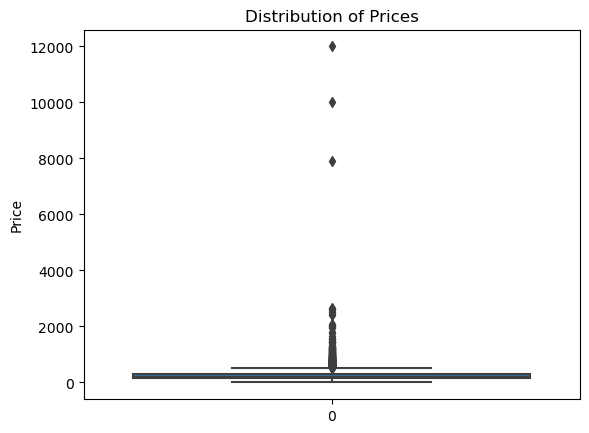

In [12]:
sns.boxplot(df['price'])
plt.ylabel('Price')
plt.title('Distribution of Prices')
plt.show()

In [13]:
lower_limit = 0
upper_limit = 550
df['price'] = df['price'].apply(lambda x: min(max(x, lower_limit), upper_limit))


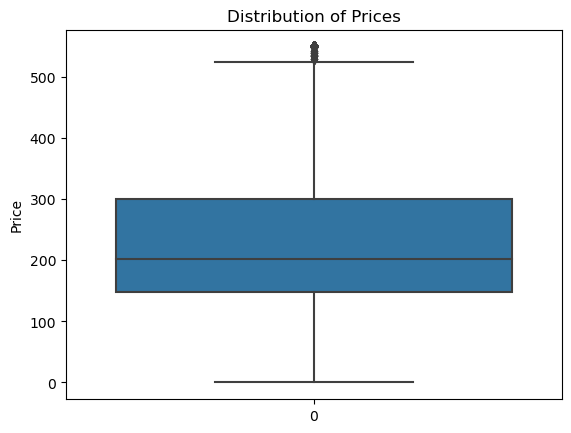

In [14]:
sns.boxplot(df['price'])
plt.ylabel('Price')
plt.title('Distribution of Prices')
plt.show()

In [15]:
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat='latitude',
    lon='longitude',
    width=600,  # Width of map
    height=600,  # Height of map
    color='price',
    hover_data=["price"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

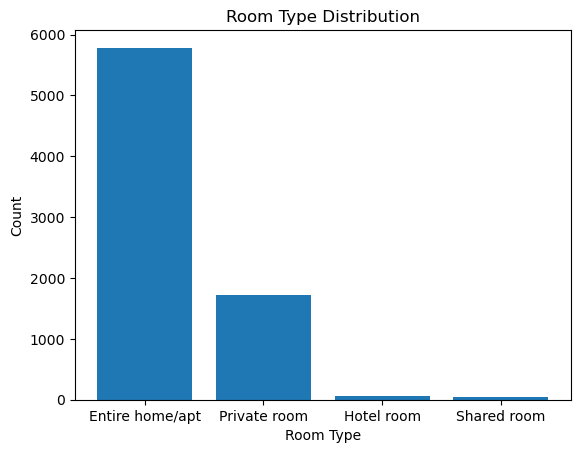

In [16]:
room_type_counts = df['room_type'].value_counts()
plt.bar(room_type_counts.index, room_type_counts.values)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Room Type Distribution')
plt.show()

In [17]:
fig = px.scatter(df, x='price', y='room_type', title='Scatter Plot: Price vs. Room Type')
fig.show()

In [18]:
fig = px.scatter(df, x='price', y='neighbourhood', title='Scatter Plot: Price vs. Room Type')
fig.show()

In [19]:
fig = px.pie(df, values='price', names='neighbourhood', title="Distribution of Prices by Neighborhood")
fig.show()

In [20]:
fig = px.pie(df, values='price', names='room_type', title="Distribution of Prices by Neighborhood")
fig.show()